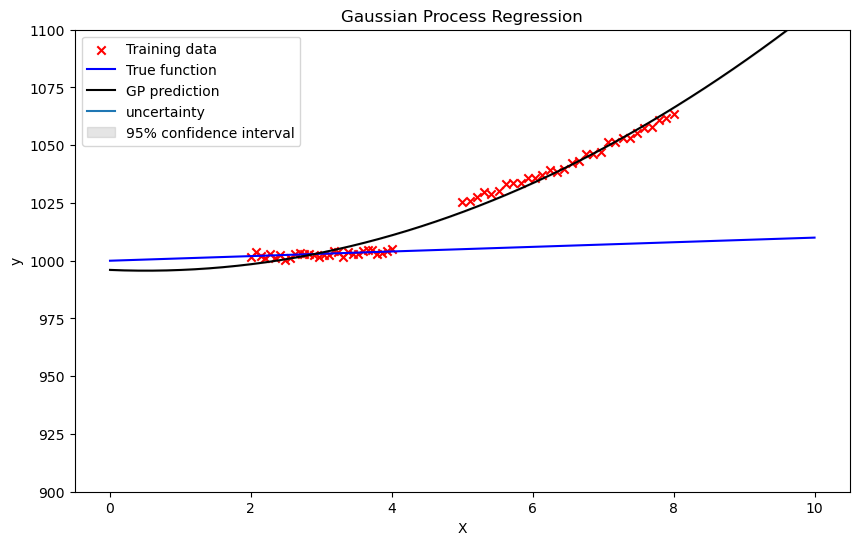

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel as C
# 生成示例数据
np.random.seed(42)  # For reproducibility

# 真实函数
def true_function(x):
    return x + 1000

def true_function2(x):
    return x**2 + 1000

# 生成训练数据：在5到8范围内取30个点
X_train_1 = np.linspace(5, 8, 30).reshape(-1, 1)  # Training points
y_train_1 = true_function2(X_train_1).ravel() + np.random.normal(0, 1, X_train_1.shape[0])  # Add some nois

X_train_2 = np.linspace(2, 4, 30).reshape(-1, 1)  # Training points
y_train_2 = true_function(X_train_2).ravel() + np.random.normal(0, 1, X_train_2.shape[0])  # Add some noise
X_train = np.concatenate([X_train_1, X_train_2], axis=0)
y_train = np.concatenate([y_train_1, y_train_2], axis=0)

# 生成测试数据：在0到10范围内取200个点
X_test = np.linspace(0, 10, 200).reshape(-1, 1)  # Test points

# 定义多项式函数
degree = 2  # 多项式的阶数
c = 1.0  # 常数项

# 在sklearn中，DotProduct内核实际上是多项式核的特殊情况（degree=1, coef0=0）
# 所以这里我们用 DotProduct 内核作为基础，然后再乘一个常数内核
kernel = C(1.0, (1e-3, 1e3)) * DotProduct(sigma_0=c) ** degree
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, n_restarts_optimizer=10)

# 训练高斯过程
gp.fit(X_train, y_train)

# 进行预测
y_pred, sigma = gp.predict(X_test, return_std=True)

# 可视化
plt.figure(figsize=(10, 6))

# 绘制训练数据
plt.scatter(X_train, y_train, c='r', marker='x', label='Training data')

# 绘制真实函数
x_plot = np.linspace(0, 10, 1000)
plt.plot(x_plot, true_function(x_plot), 'b', label='True function')

# 绘制高斯过程预测
plt.plot(X_test, y_pred, 'k', label='GP prediction')
plt.plot(X_test, sigma, label='uncertainty')
plt.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='gray', alpha=0.2, label='95% confidence interval')

plt.xlabel('X')
plt.ylabel('y')
plt.ylim(900,1100)
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


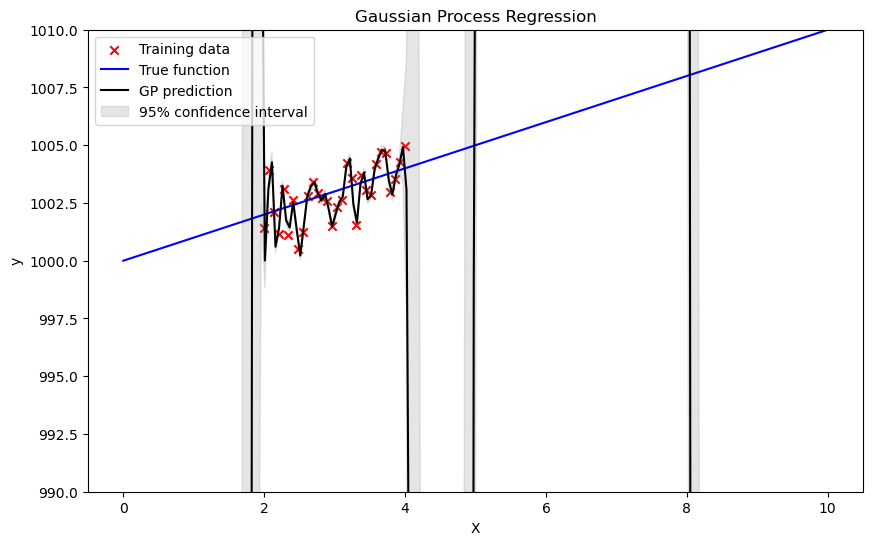

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# 生成示例数据
np.random.seed(42)  # For reproducibility

# 真实函数
def true_function(x):
    return x + 1000

def true_function2(x):
    return x**2 + 1000

# 生成训练数据：在5到8范围内取30个点
X_train_1 = np.linspace(5, 8, 30).reshape(-1, 1)  # Training points
y_train_1 = true_function2(X_train_1).ravel() + np.random.normal(0, 1, X_train_1.shape[0])  # Add some noise

X_train_2 = np.linspace(2, 4, 30).reshape(-1, 1)  # Training points
y_train_2 = true_function(X_train_2).ravel() + np.random.normal(0, 1, X_train_2.shape[0])  # Add some noise
X_train = np.concatenate([X_train_1, X_train_2], axis=0)
y_train = np.concatenate([y_train_1, y_train_2], axis=0)

# 生成测试数据：在0到10范围内取200个点
X_test = np.linspace(0, 10, 200).reshape(-1, 1)  # Test points

# 定义核函数
rbf_kernel = RBF(length_scale=1.0)

# 在sklearn中，DotProduct内核实际上是多项式核的特殊情况（degree=1, coef0=0）
# 所以这里我们用 DotProduct 内核作为基础，然后再乘一个常数内核
kernel = C(1.0) * (RBF(length_scale=1.0))
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, n_restarts_optimizer=10)

# 训练高斯过程
gp.fit(X_train, y_train)

# 进行预测
y_pred, sigma = gp.predict(X_test, return_std=True)

# 可视化
plt.figure(figsize=(10, 6))

# 绘制训练数据
plt.scatter(X_train, y_train, c='r', marker='x', label='Training data')

# 绘制真实函数
x_plot = np.linspace(0, 10, 1000)
plt.plot(x_plot, true_function(x_plot), 'b', label='True function')

# 绘制高斯过程预测
plt.plot(X_test, y_pred, 'k', label='GP prediction')
plt.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='gray', alpha=0.2, label='95% confidence interval')

plt.xlabel('X')
plt.ylabel('y')
plt.ylim(990,1010)
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

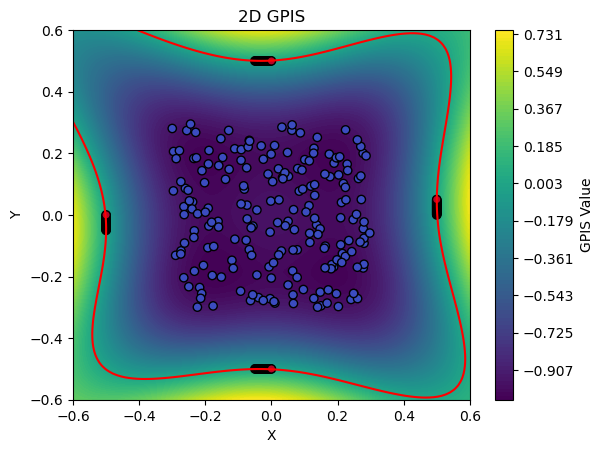

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 1. 数据准备
# 创建边界点
N_boundary = 100  # 边界点数量
N_interior = 200  # 内部点数量0
noise_level = 0.00

# 正方形边界：四条边，每条边上的点集中在中间
x_boundary = np.concatenate([
    np.linspace(-0.05, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 下边
    np.linspace(-0.05, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 上边
    np.full(N_boundary // 4, -0.5) + np.random.normal(0, noise_level, N_boundary // 4),           # 左边
    np.full(N_boundary // 4, 0.5) + np.random.normal(0, noise_level, N_boundary // 4)             # 右边
])
y_boundary = np.concatenate([
    np.full(N_boundary // 4, -0.5) + np.random.normal(0, noise_level, N_boundary // 4),           # 下边
    np.full(N_boundary // 4, 0.5) + np.random.normal(0, noise_level, N_boundary // 4),            # 上边
    np.linspace(-0.05, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 左边
    np.linspace(-0, 0.05, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4)   # 右边
])
X_boundary = np.vstack([x_boundary, y_boundary]).T
y_boundary = np.zeros(N_boundary)

# 正方形内部随机点
x_interior = np.random.uniform(-0.3, 0.3, N_interior)
y_interior = np.random.uniform(-0.3, 0.3, N_interior)
X_interior = np.vstack([x_interior, y_interior]).T
y_interior = -np.ones(N_interior)

# 合并数据集
X_train = np.vstack([X_boundary, X_interior])
y_train = np.concatenate([y_boundary, y_interior])

# 2. 训练高斯过程模型
# 核函数设置为RBF核
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# 创建GP模型
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# 训练模型
gp.fit(X_train, y_train)

# 3. 可视化结果
# 构建网格
x = np.linspace(-0.6, 0.6, 100)
y = np.linspace(-0.6, 0.6, 100)
X, Y = np.meshgrid(x, y)
X_test = np.vstack([X.ravel(), Y.ravel()]).T

# 预测
y_pred, sigma = gp.predict(X_test, return_std=True)
Z = y_pred.reshape(X.shape)

# 绘制结果
plt.contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="viridis")
plt.colorbar(label='GPIS Value')
plt.contour(X, Y, Z, levels=[0], colors='red')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
plt.title("2D GPIS")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<>:18: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
<>:18: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
/tmp/ipykernel_12450/3683938889.py:18: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
  K_gradient = -0.5 * (dists + self.c**2)**(-1.5)[:, :, np.newaxis]


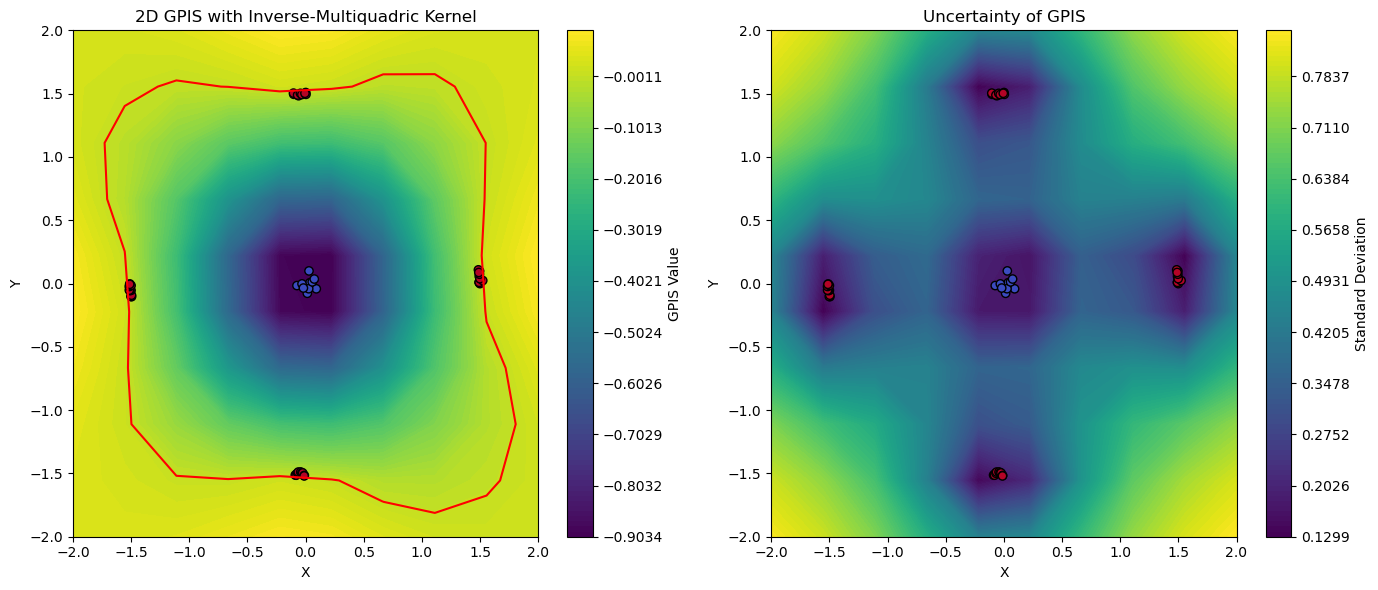

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Kernel

# 1. 定义Inverse-Multiquadric Kernel
class InverseMultiquadricKernel(Kernel):
    def __init__(self, c=1.0):
        self.c = c

    def __call__(self, X, Y=None, eval_gradient=False):
        if Y is None:
            Y = X
        dists = np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2, axis=2)
        K = 1.0 / np.sqrt(dists + self.c**2)
        
        if eval_gradient:
            K_gradient = -0.5 * (dists + self.c**2)**(-1.5)[:, :, np.newaxis]
            return K, K_gradient
        return K

    def diag(self, X):
        return np.full(X.shape[0], 1 / np.sqrt(self.c**2))

    def is_stationary(self):
        return True

# 2. 数据准备
# 创建边界点
N_boundary = 40  # 边界点数量
N_interior = 10  # 内部点数量
noise_level = 0.01

# 正方形边界：四条边，每条边上的点集中在中间
x_boundary = np.concatenate([
    np.linspace(-0.1, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 下边
    np.linspace(-0.1, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 上边
    np.full(N_boundary // 4, -1.5) + np.random.normal(0, noise_level, N_boundary // 4),           # 左边
    np.full(N_boundary // 4, 1.5) + np.random.normal(0, noise_level, N_boundary // 4)             # 右边
])
y_boundary = np.concatenate([
    np.full(N_boundary // 4, -1.5) + np.random.normal(0, noise_level, N_boundary // 4),           # 下边
    np.full(N_boundary // 4, 1.5) + np.random.normal(0, noise_level, N_boundary // 4),            # 上边
    np.linspace(-0.1, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 左边
    np.linspace(-0, 0.1, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4)   # 右边
])
X_boundary = np.vstack([x_boundary, y_boundary]).T
y_boundary = np.zeros(N_boundary)

# 正方形内部随机点
x_interior = np.random.uniform(-0.1, 0.1, N_interior)
y_interior = np.random.uniform(-0.1, 0.1, N_interior)
X_interior = np.vstack([x_interior, y_interior]).T
y_interior = -np.ones(N_interior)

# 合并数据集
X_train = np.vstack([X_boundary, X_interior])
y_train = np.concatenate([y_boundary, y_interior])

# 3. 训练高斯过程模型
# 使用自定义的Inverse-Multiquadric核
kernel = InverseMultiquadricKernel(c=1.0)

# 创建GP模型
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# 训练模型
gp.fit(X_train, y_train)

# 4. 可视化结果
# 构建网格
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
X_test = np.vstack([X.ravel(), Y.ravel()]).T

# 预测
y_pred, sigma = gp.predict(X_test, return_std=True)
Z = y_pred.reshape(X.shape)
Z_std = sigma.reshape(X.shape)

# 绘制结果
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 预测均值图
contour1 = ax[0].contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="viridis")
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
ax[0].contour(X, Y, Z, levels=[0], colors='red')
ax[0].set_title("2D GPIS with Inverse-Multiquadric Kernel")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
fig.colorbar(contour1, ax=ax[0], label='GPIS Value')

# 不确定性图
contour2 = ax[1].contourf(X, Y, Z_std, levels=np.linspace(Z_std.min(), Z_std.max(), 100), cmap="viridis")
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
ax[1].set_title("Uncertainty of GPIS")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
fig.colorbar(contour2, ax=ax[1], label='Standard Deviation')

plt.tight_layout()
plt.show()


<>:19: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
<>:19: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
/tmp/ipykernel_12450/4001390309.py:19: SyntaxWarning: 'float' object is not subscriptable; perhaps you missed a comma?
  K_gradient = -0.5 * (dists + self.c**2)**(-1.5)[:, :, np.newaxis]


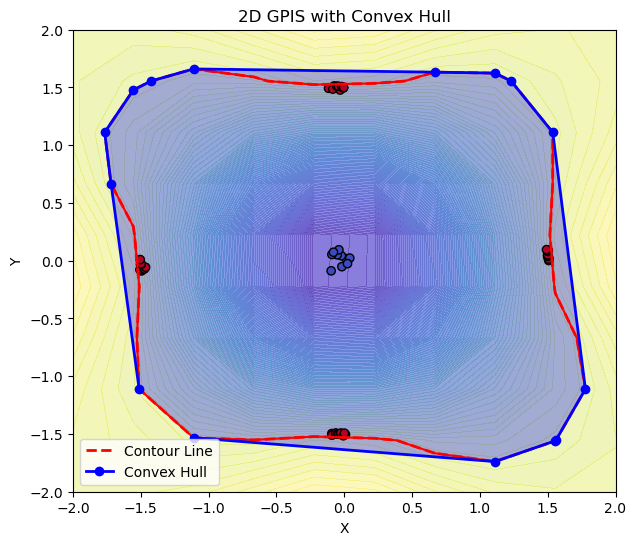

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Kernel

# 自定义的Inverse-Multiquadric核
class InverseMultiquadricKernel(Kernel):
    def __init__(self, c=1.0):
        self.c = c

    def __call__(self, X, Y=None, eval_gradient=False):
        if Y is None:
            Y = X
        dists = np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2, axis=2)
        K = 1.0 / np.sqrt(dists + self.c**2)
        
        if eval_gradient:
            K_gradient = -0.5 * (dists + self.c**2)**(-1.5)[:, :, np.newaxis]
            return K, K_gradient
        return K

    def diag(self, X):
        return np.full(X.shape[0], 1 / np.sqrt(self.c**2))

    def is_stationary(self):
        return True

# 数据准备
N_boundary = 40  # 边界点数量
N_interior = 10  # 内部点数量
noise_level = 0.01

# 正方形边界点
x_boundary = np.concatenate([
    np.linspace(-0.1, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.1, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, -1.5) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 1.5) + np.random.normal(0, noise_level, N_boundary // 4)
])
y_boundary = np.concatenate([
    np.full(N_boundary // 4, -1.5) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 1.5) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.1, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0, 0.1, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4)
])
X_boundary = np.vstack([x_boundary, y_boundary]).T
y_boundary = np.zeros(N_boundary)

# 正方形内部随机点
x_interior = np.random.uniform(-0.1, 0.1, N_interior)
y_interior = np.random.uniform(-0.1, 0.1, N_interior)
X_interior = np.vstack([x_interior, y_interior]).T
y_interior = -np.ones(N_interior)

# 合并数据集
X_train = np.vstack([X_boundary, X_interior])
y_train = np.concatenate([y_boundary, y_interior])

# 训练高斯过程模型
kernel = InverseMultiquadricKernel(c=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp.fit(X_train, y_train)

# 构建网格
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
X_test = np.vstack([X.ravel(), Y.ravel()]).T

# 预测
y_pred, sigma = gp.predict(X_test, return_std=True)
Z = y_pred.reshape(X.shape)

# 绘制结果
fig, ax = plt.subplots(figsize=(7, 6))

# 绘制预测均值图
contour = ax.contour(X, Y, Z, levels=[0], colors='red')

# 提取轮廓线上的点
contour_lines = contour.allsegs[0]
contour_points = np.vstack(contour_lines[0])

# 计算凸包
hull = ConvexHull(contour_points)
hull_points = contour_points[hull.vertices]

# 绘制预测均值和凸包
ax.contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="viridis", alpha=0.3)
ax.plot(contour_points[:, 0], contour_points[:, 1], 'r--', lw=2, label='Contour Line')
ax.plot(hull_points[:, 0], hull_points[:, 1], 'bo-', lw=2, label='Convex Hull')
ax.fill(hull_points[:, 0], hull_points[:, 1], 'b', alpha=0.3)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
ax.set_title("2D GPIS with Convex Hull")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

plt.show()

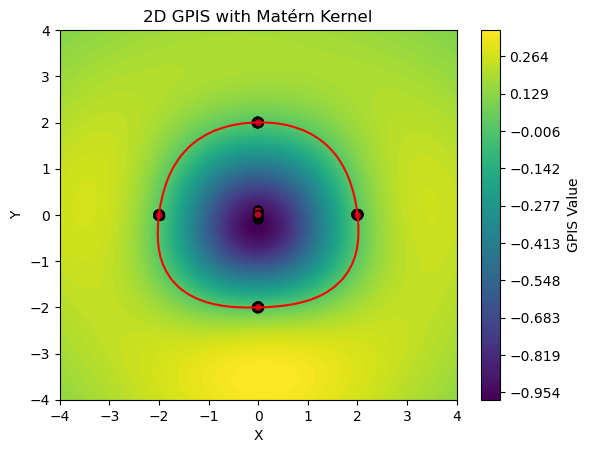

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

# 2. 数据准备
# 创建边界点
N_boundary = 400  # 边界点数量
N_interior = 100 # 内部点数量
noise_level = 0.01

# 正方形边界：四条边，每条边上的点集中在中间
x_boundary = np.concatenate([
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 下边
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 上边
    np.full(N_boundary // 4, -2) + np.random.normal(0, noise_level, N_boundary // 4),           # 左边
    np.full(N_boundary // 4, 2) + np.random.normal(0, noise_level, N_boundary // 4)             # 右边
])
y_boundary = np.concatenate([
    np.full(N_boundary // 4, -2) + np.random.normal(0, noise_level, N_boundary // 4),           # 下边
    np.full(N_boundary // 4, 2) + np.random.normal(0, noise_level, N_boundary // 4),            # 上边
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),  # 左边
    np.linspace(-0, 0.01, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4)   # 右边
])
X_boundary = np.vstack([x_boundary, y_boundary]).T
y_boundary = np.zeros(N_boundary)

# 正方形内部随机点
x_interior = np.random.uniform(-0.01, 0.01, N_interior)
y_interior = np.random.uniform(-0.1, 0.1, N_interior)
X_interior = np.vstack([x_interior, y_interior]).T
y_interior = -np.ones(N_interior)

x_interior_noise = np.random.uniform(-0.01, 0.01, 5)
y_interior_noise = np.random.uniform(-0.1, 0.1, 5)
x_interior_noise = np.vstack([x_interior_noise, y_interior_noise]).T
y_interior_noise = -np.zeros(5)

# 合并数据集
X_train = np.vstack([X_boundary, X_interior, x_interior_noise])
y_train = np.concatenate([y_boundary, y_interior, y_interior_noise])

# 3. 训练高斯过程模型
# 使用Matérn核, ν=2.5 (可以根据需要选择ν=1.5或ν=2.5)
kernel = Matern(length_scale=1.0, nu=2.5)

# 创建GP模型
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# 训练模型
gp.fit(X_train, y_train)

# 4. 可视化结果
# 构建网格
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
X_test = np.vstack([X.ravel(), Y.ravel()]).T

# 预测
y_pred, sigma = gp.predict(X_test, return_std=True)
Z = y_pred.reshape(X.shape)

# 绘制结果
plt.contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="viridis")
plt.colorbar(label='GPIS Value')
plt.contour(X, Y, Z, levels=[0], colors='red')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
plt.title("2D GPIS with Matérn Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

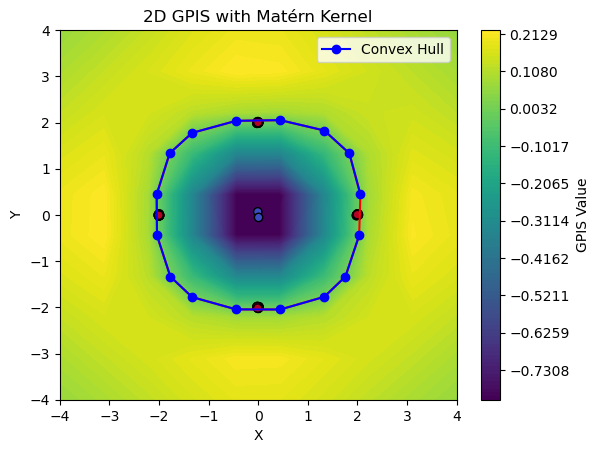

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.spatial import ConvexHull

# 1. 数据准备
N_boundary = 100
N_interior = 2
noise_level = 0.01

# 创建边界点
x_boundary = np.concatenate([
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, -2) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 2) + np.random.normal(0, noise_level, N_boundary // 4)
])
y_boundary = np.concatenate([
    np.full(N_boundary // 4, -2) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 2) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0, 0.01, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4)
])
X_boundary = np.vstack([x_boundary, y_boundary]).T
y_boundary = np.zeros(N_boundary)

# 正方形内部随机点
x_interior = np.random.uniform(-0.01, 0.01, N_interior)
y_interior = np.random.uniform(-0.1, 0.1, N_interior)
X_interior = np.vstack([x_interior, y_interior]).T
y_interior = -np.ones(N_interior)

# 合并数据集
X_train = np.vstack([X_boundary, X_interior])
y_train = np.concatenate([y_boundary, y_interior])

# 2. 训练高斯过程模型
kernel = Matern(length_scale=1.0, nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp.fit(X_train, y_train)

# 3. 可视化结果
x = np.linspace(-4, 4, 10)
y = np.linspace(-4, 4, 10)
X, Y = np.meshgrid(x, y)
X_test = np.vstack([X.ravel(), Y.ravel()]).T
y_pred, sigma = gp.predict(X_test, return_std=True)
Z = y_pred.reshape(X.shape)

# 绘制等值线
contour = plt.contour(X, Y, Z, levels=[0], colors='red')

# 提取轮廓线的点
contour_lines = contour.collections[0].get_paths()
contour_points = np.concatenate([line.vertices for line in contour_lines])

# 计算凸包
hull = ConvexHull(contour_points)
hull_points = contour_points[hull.vertices]

# 绘制结果
plt.contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="viridis")
plt.colorbar(label='GPIS Value')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
plt.plot(hull_points[:, 0], hull_points[:, 1], 'bo-', label='Convex Hull')
plt.title("2D GPIS with Matérn Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

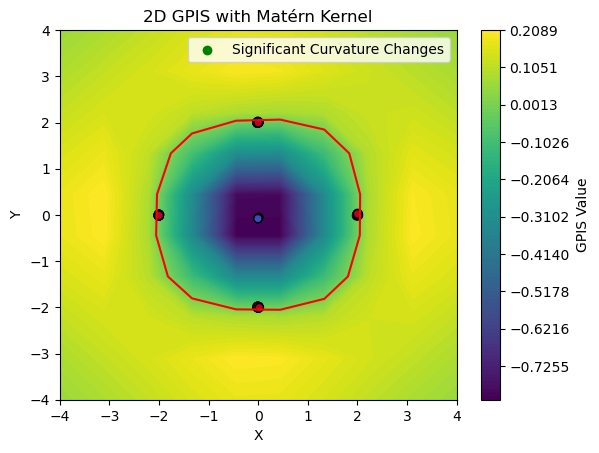

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.spatial import ConvexHull

def compute_angle(p1, p2, p3):
    """计算三个点形成的角度"""
    v1 = p2 - p1
    v2 = p3 - p2
    angle = np.arctan2(np.linalg.det([v1, v2]), np.dot(v1, v2))
    return np.abs(angle)

def compute_curvature_changes(pts):
    """计算曲率变化"""
    angles = []
    for i in range(len(pts)):
        p1 = pts[i]
        p2 = pts[(i + 1) % len(pts)]
        p3 = pts[(i + 2) % len(pts)]
        
        angle = compute_angle(p1, p2, p3)
        angles.append(angle)
    
    # 计算相邻角度的差异
    angle_changes = np.abs(np.diff(angles, axis=0))
    return np.concatenate([[angles[-1]], angle_changes])

def find_significant_curvature_changes(points, angle_threshold_degrees=5):
    """找出曲率变化大于指定角度的点"""
    # 计算凸包
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    
    # 计算曲率变化
    curvature_changes = compute_curvature_changes(hull_points)
    
    # 将角度阈值从度转换为弧度
    angle_threshold_radians = np.deg2rad(angle_threshold_degrees)
    
    # 找到曲率变化大于阈值的点
    significant_points = hull_points[curvature_changes > angle_threshold_radians]
    
    return hull_points, significant_points

# 生成数据点
np.random.seed(0)
N_boundary = 100
N_interior = 2
noise_level = 0.01

# 创建边界点
x_boundary = np.concatenate([
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, -2) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 2) + np.random.normal(0, noise_level, N_boundary // 4)
])
y_boundary = np.concatenate([
    np.full(N_boundary // 4, -2) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 2) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.01, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0, 0.01, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4)
])
X_boundary = np.vstack([x_boundary, y_boundary]).T
y_boundary = np.zeros(N_boundary)

# 正方形内部随机点
x_interior = np.random.uniform(-0.01, 0.01, N_interior)
y_interior = np.random.uniform(-0.1, 0.1, N_interior)
X_interior = np.vstack([x_interior, y_interior]).T
y_interior = -np.ones(N_interior)

# 合并数据集
X_train = np.vstack([X_boundary, X_interior])
y_train = np.concatenate([y_boundary, y_interior])

# 训练高斯过程模型
kernel = Matern(length_scale=1.0, nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp.fit(X_train, y_train)

# 可视化结果
x = np.linspace(-4, 4, 10)
y = np.linspace(-4, 4, 10)
X, Y = np.meshgrid(x, y)
X_test = np.vstack([X.ravel(), Y.ravel()]).T
y_pred, sigma = gp.predict(X_test, return_std=True)
Z = y_pred.reshape(X.shape)

# 绘制等值线
contour = plt.contour(X, Y, Z, levels=[0], colors='red')

# 提取轮廓线的点
contour_lines = contour.collections[0].get_paths()
contour_points = np.concatenate([line.vertices for line in contour_lines])

# 计算曲率变化大于30度的点
hull_points, significant_points = find_significant_curvature_changes(contour_points, angle_threshold_degrees=30)

# 绘制结果
plt.contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="viridis")
plt.colorbar(label='GPIS Value')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
# plt.plot(hull_points[:, 0], hull_points[:, 1], 'bo-', label='Convex Hull')
plt.scatter(significant_points[:, 0], significant_points[:, 1], c='green', label='Significant Curvature Changes')
plt.title("2D GPIS with Matérn Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

ValueError: x must be strictly increasing if s = 0

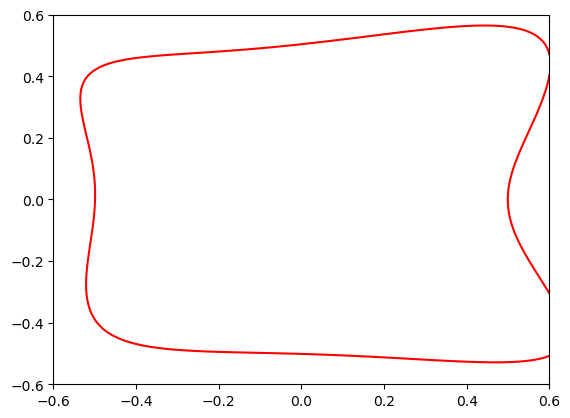

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline

# 数据准备
N_boundary = 100
N_interior = 20
noise_level = 0.0

x_boundary = np.concatenate([
    np.linspace(-0.05, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.05, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, -0.5) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 0.5) + np.random.normal(0, noise_level, N_boundary // 4)
])
y_boundary = np.concatenate([
    np.full(N_boundary // 4, -0.5) + np.random.normal(0, noise_level, N_boundary // 4),
    np.full(N_boundary // 4, 0.5) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0.05, 0, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4),
    np.linspace(-0, 0.05, N_boundary // 4) + np.random.normal(0, noise_level, N_boundary // 4)
])
X_boundary = np.vstack([x_boundary, y_boundary]).T
y_boundary = np.zeros(N_boundary)

x_interior = np.random.uniform(-0.1, 0.1, N_interior)
y_interior = np.random.uniform(-0.3, 0.3, N_interior)
X_interior = np.vstack([x_interior, y_interior]).T
y_interior = -np.ones(N_interior)

X_train = np.vstack([X_boundary, X_interior])
y_train = np.concatenate([y_boundary, y_interior])

# 训练GP模型
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp.fit(X_train, y_train)

# 可视化
x = np.linspace(-0.6, 0.6, 100)
y = np.linspace(-0.6, 0.6, 100)
X, Y = np.meshgrid(x, y)
X_test = np.vstack([X.ravel(), Y.ravel()]).T
y_pred, sigma = gp.predict(X_test, return_std=True)
Z = y_pred.reshape(X.shape)

# 提取等高线数据
contours = plt.contour(X, Y, Z, levels=[0], colors='red')
contour_path = contours.collections[0].get_paths()[0]
vertices = contour_path.vertices
x_contour = vertices[:, 0]
y_contour = vertices[:, 1]

# 排序数据
sorted_indices = np.argsort(x_contour)
x_contour_sorted = x_contour[sorted_indices]
y_contour_sorted = y_contour[sorted_indices]

# 计算曲率的函数
def calculate_curvature(x, y):
    # 使用样条插值拟合曲线
    spline = UnivariateSpline(x, y, k=3, s=0)
    dx = spline.derivative(1)
    d2x = spline.derivative(2)
    
    # 曲率计算
    curvature = d2x / (1 + dx(x)**2)**(3/2)
    return curvature

# 计算曲率
curvature = calculate_curvature(x_contour_sorted, y_contour_sorted)

# 找到曲率小于0的点
negative_curvature_points = np.array([(x_contour_sorted[i], y_contour_sorted[i]) for i in range(len(curvature)) if curvature[i] < 0])

# 绘制结果
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="viridis")
plt.colorbar(label='GPIS Value')
plt.contour(X, Y, Z, levels=[0], colors='red')
plt.scatter(x_contour_sorted, y_contour_sorted, c=curvature, cmap="coolwarm", edgecolor="k")
plt.scatter(negative_curvature_points[:, 0], negative_curvature_points[:, 1], color='blue', label='Curvature < 0')
plt.title("Contour with Curvature < 0 Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

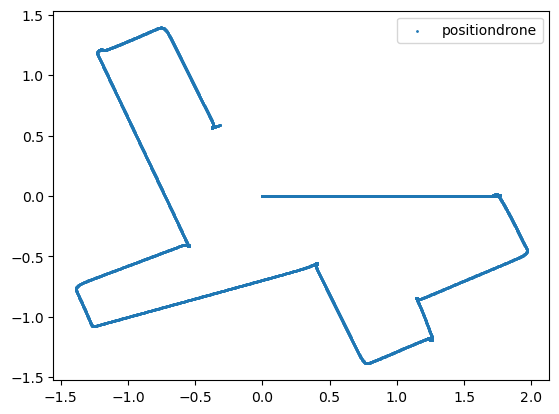

In [7]:
import pandas as pd
def convert_str_to_float(s):
    # 去掉方括号
    s = s.strip("[]")
    # 转换为浮点数
    return float(s)
data = pd.read_csv('drone_states.csv')
x = data.iloc[:, 0].apply(convert_str_to_float).values
y = data.iloc[:, 1].apply(convert_str_to_float).values
yaw=data.iloc[:,2].values
laser1=data.iloc[:,3].values
laser2=data.iloc[:,4].values
value1=data.iloc[:,5].values
value2=data.iloc[:,6].values

plt.scatter(x, y, s=1, label='positiondrone')
plt.legend()

In [10]:
import pandas as pd
import numpy as np

# 1. 读取数据
data = pd.read_csv('drone_states.csv')

# 2. 提取嵌套列表中的数值并进行条件修改
def extract_and_limit(value):
    # 提取第一个元素的第一个元素
    num = eval(value)[0][0] if isinstance(value, str) else value
    return min(float(num), 0.5)

# 对每列应用转换
data['state_lasers1'] = data['state_lasers1'].apply(extract_and_limit)
data['state_lasers2'] = data['state_lasers2'].apply(extract_and_limit)

# 3. 保存修改
data.to_csv('drone_states_modified.csv', index=False)

KeyError: 'state_laser1'